## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247 Winter Quarter 2020, Prof. J.C. Kao, TAs W. Feng, J. Lee, K. Liang, M. Kleinman, C. Zheng

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

(200,)
(200,)


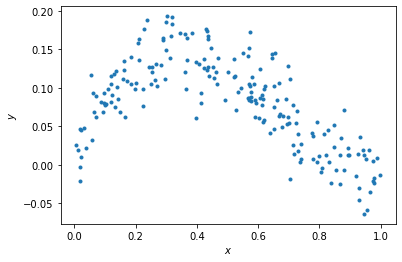

In [161]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
##plt.plot(x,y,'ro')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
print(np.shape(x))
print(np.shape(y))

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) The generating distribution of x is uniformly distributed. The chances of a different numbers being generated are equal. 

(2) The additive noise is distributed in a normal distribution with center at 0 and standard deviation of 0.03. 

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [162]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

#xhat2 = np.vstack((x**2,xhat))

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

theta = np.zeros(2,) # please modify this line

theta = np.linalg.inv(xhat.dot(xhat.T)).dot(xhat.dot(y))

# ================== #
# END YOUR CODE HERE #
# ================== #

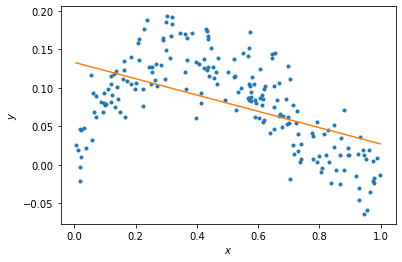

In [165]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))


### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) You fill this out. The linear model under-fit the data. 

(2) You fill this out. We can increase the linear model to a higher degree polynomial model. eg. a polynomial of degree 3. 

### Fitting data to the model (10 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [166]:
N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc
xhat = np.vstack((x, np.ones_like(x)))
for i in range(N):
    thetas.append(np.zeros(i+2,))
    if i == 0:
        xhat = xhat
    else: 
        xhat = np.vstack((x**(i+1), xhat))
    thetas[i] = np.linalg.inv(xhat.dot(xhat.T)).dot(xhat.dot(y))
    #print(thetas)
    
#print('this is thetas', thetas, 'it length is ', len(thetas))
#print(np.zeros(3,))


# ================== #
# END YOUR CODE HERE #
# ================== #

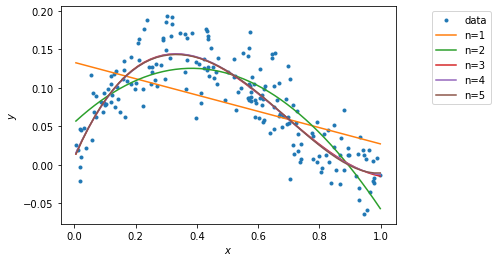

In [167]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (10 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5:

$L(\theta) = \frac{1}{2}\sum_{j}(\hat{y}_j - y_j)^2$

In [168]:
training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

for i in range(N):
    training_errors.append(0)
    training_errors[i] = 0.5*(y-thetas[i].T.dot(xhat[np.r_[-(i+2):0]])).dot((y-thetas[i].T.dot(xhat[np.r_[-(i+2):0]])).T)

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.
pass

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)
print(np.argmin(training_errors))

Training errors are: 
 [0.23799610883627012, 0.10924922209268528, 0.08169603801105373, 0.08165353735296978, 0.08161479195525294]
4


### QUESTIONS

(1) Which polynomial model has the best training error? 

(2) Why is this expected?

### ANSWERS

(1) The 5th order polynomial has the least training error. 

(2) Because higher polynomials can always fit more data points. If the polynomial is of the same degree as the number of data points, all points will be on the fitting curve. This gives us an error of 0. And if we reduce the degree, some points will be off the curve. Therefore gives a greater error. 

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate the testing error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

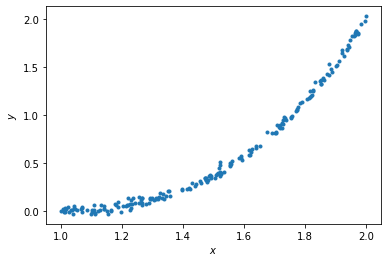

In [170]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


In [171]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

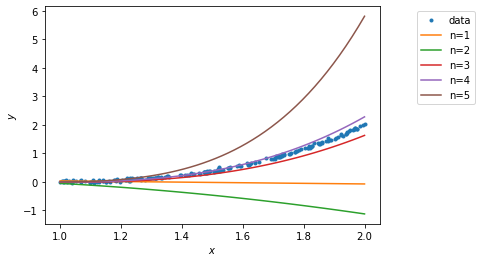

In [172]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [173]:
testing_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #
for i in range(N):
    testing_errors.append(0)
    testing_errors[i] = 0.5*(y-thetas[i].T.dot(xhat[np.r_[-(i+2):0]])).dot((y-thetas[i].T.dot(xhat[np.r_[-(i+2):0]])).T)
# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.
pass

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [76.99016367401431, 203.73253090771217, 3.1520054584448314, 0.995664255348184, 195.75036594514617]


### QUESTIONS

(1) Which polynomial model has the best testing error?

(2) Why does the order-5 polynomial model not generalize well?

### ANSWERS

(1) The polynomial of 4th order has the best testing error. It has error of 1.2283440025408245 which is the smallest. 
(2) Since our theta was trained by a smaller scale of data, the polynomial of order 5 is an overfitting model. Our testing is in a greater scale. Therefore eventhough the training error is small, the model might not be the best fit for all of the data. If we increase the testing data set, we might see that the polynomial of 3rd order might be the best fit. 